# `bbhx` Tutorial

`bbhx` is a software package that produces black hole binary waveforms. It focuses on LISA and provides the proper LISA response function for MBHBs ([arXiv:1806.10734](https://arxiv.org/abs/1806.10734), [arXiv:2003.00357](https://arxiv.org/abs/2003.00357)). `bbhx` also provides fast likelihood functions. The package is GPU-accelerated for fast analysis. 

If you use this software please cite [arXiv:2005.01827](https://arxiv.org/abs/2005.01827) and [arXiv:2111.01064](https://arxiv.org/abs/2111.01064) any parts within the package that you use (like waveforms and response functions). See the `citation` attribute for each class. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from bbhx.waveformbuild import BBHWaveformFD
from bbhx.utils.constants import *

No CuPy
No CuPy or GPU PhenomHM module.
No CuPy or GPU response available.
No CuPy or GPU interpolation available.


## GPU accelerated MBHB waveforms for LISA

First, we will detail how to produce full waveforms for MBHBs to be detected by LISA. We will look at how to generate PhenomHM waveforms ([arXiv:1708.00404](https://arxiv.org/abs/1708.00404), [arXiv:1508.07253](https://arxiv.org/abs/1508.07253), [arXiv:1508.07250](https://arxiv.org/abs/1508.07250)) put through the LISA response function (([arXiv:1806.10734](https://arxiv.org/abs/1806.10734), [arXiv:2003.00357](https://arxiv.org/abs/2003.00357)). More information on generating the waveforms and response separately can be found below. 

In [2]:
wave_gen = BBHWaveformFD(amp_phase_kwargs=dict(run_phenomd=False))

In [3]:
# set parameters
f_ref = 0.0  # let phenom codes set fRef -> fmax = max(f^2A(f))
phi0 = 0.0
m1 = 1e6
m2 = 5e5
a1 = 0.2
a2 = 0.4
dist = 3e3  * PC_SI * 1e6 # 3e3 in Mpc 
inc = np.pi/3.
beta = np.pi/4.
lam = np.pi/5.
psi = np.pi/6.
t_ref = 1.0 * YRSID_SI  # in the SSB reference frame

freq = np.logspace(-4, 0, 1024)
freq_new = np.logspace(-4, 0, 10000)
modes = [(2,2), (2,1), (3,3), (3,2), (4,4), (4,3)]


In [4]:
wave = wave_gen(m1, m2, a1, a2,
                          dist, phi0, f_ref, inc, lam, 
                          beta, psi, t_ref, freqs=freq_new,
                          modes=modes, direct=False, fill=True, squeeze=True, length=1024)[0] 

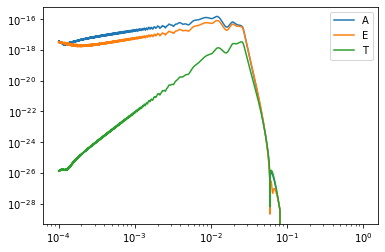

In [7]:
for i, let in enumerate(["A", "E", "T"]):
    plt.loglog(freq_new, np.abs(wave[i]), label=let)
plt.legend()